# Framingham Heart study

# ![](https://cdn-a.william-reed.com/var/wrbm_gb_food_pharma/storage/images/publications/food-beverage-nutrition/nutraingredients.com/article/2018/02/02/are-crash-diets-risky-for-the-heart-study-links-low-calorie-diets-and-meal-replacement-programs-with-worsening-of-heart-functions/7817559-2-eng-GB/Are-crash-diets-risky-for-the-heart-Study-links-low-calorie-diets-and-meal-replacement-programs-with-worsening-of-heart-functions_wrbm_large.jpg)

# Contents
1. Introduction
2. Data Preparation
3. Data Visualization
4. Model Selection
5. Prediction
6. Conclusion

# 1. Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using various machine learning models.

# 2. Data Preparation

## 2.1 About the Dataset

The dataset is available on National Heart, Lung, and Blood Institute (NHLBI), also publicly available on the Kaggle website is about an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information, which includes over 4,240 records and 16 attributes. Each attribute is considered as a potential risk factor. It is distributed in demographic, behavioral, and medical risk factors.

### Demographic:

- Gender: male or female (1 = male, 0 = female; Nominal)
- Age: age of the patient (Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- Education: 1 = High School, 2 = High School or GED, 3 = College or Vocational School,4 = College or University.

### Behavioral:
- CurrentSmoker: whether the patient is a current smoker (0 = nonsmoker, 1 = smoker;Nominal)
- CigsPerDay: The number of cigarettes that the person smoked on average in one day. (Itb is considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical history:
- BPMeds: whether the patient was on blood pressure medication (0 = Not on Blood Pressure medications, 1 = Is on Blood Pressure medications; Nominal)
- PrevalentStroke: whether the patient had previously had a stroke (0 = No, 1 = Yes; Nominal)
- PrevalentHyp: whether the patient was hypertensive (0 = No, 1 = Yes; Nominal)
- Diabetes: whether the patient had diabetes (0 = No, 1 = Yes; Nominal)

### Medical current record:
- TotChol: total cholesterol level in mg/dL (Continuous)
- SysBP: systolic blood pressure in mmHg (Continuous)
- DiaBP: diastolic blood pressure in mmHg(Continuous)
- BMI: Body Mass Index calculated as Weight (kilogram) / Height (metersquared)(Continuous)
- HeartRate: heart rate in Beats/Min (Ventricular)
- Glucose: glucose level in mg/dL (Continuous)
- Ten Year CHD: Coronary heart disease (CHD) diagnosed in last 10 year (0 = No; 1 = Yes)

## 2.2 Importing Libraries

In [1]:
#Importing all the required libraries
# linear algebra
import numpy as np
import math as mth

# Data analysis and Visualization
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# Machine learning
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from statsmodels.tools import add_constant as add_constant
import matplotlib.mlab as mlab
%matplotlib inline

## 2.3 Load & Display the Data

Once all the required libraries are imported, we then upload the dataset by reading Data from CSV file.

In [2]:
# Read the data
heart_dataset = pd.read_csv("C:\\Users\\Apurva Sarode\\Desktop\\Capstone_Heart\\framingham.csv")

# Display the first few lines
heart_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2.4 Data Cleaning

In [3]:
# Formating the Columns
heart_dataset.rename(columns={'male':'gender'},inplace=True)

# Identify missing values
heart_dataset.isna().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

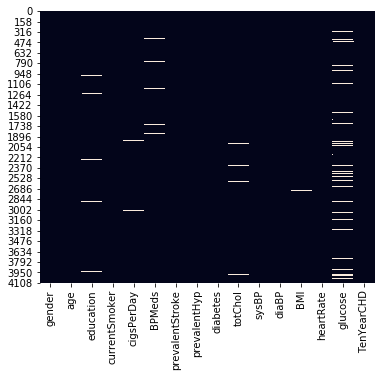

In [4]:
# Identify missing values
plt.figure(figsize=(6,5,))
sns.heatmap(heart_dataset.isnull(), cbar = False)

In [5]:
# Identify count of different types of objects.
heart_dataset.get_dtype_counts()

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  


float64    9
int64      7
dtype: int64

In [6]:
# Showing data types of variables
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
gender             4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
# Identify numeric and categorical columns 
numeric_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_columns = [c for c in heart_dataset.columns if c not in numeric_columns]
print(categorical_columns)

['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


## 2.5 Missing Values

In [8]:
# Fill missing values with Mean
heart_dataset["glucose"].fillna(round(heart_dataset["glucose"].mean()) , inplace = True)
heart_dataset["BMI"].fillna(round(heart_dataset["BMI"].mean()) , inplace = True)
heart_dataset["totChol"].fillna(round(heart_dataset["totChol"].mean()) , inplace = True)
heart_dataset["heartRate"].fillna(round(heart_dataset["heartRate"].mean()) , inplace = True)
heart_dataset["cigsPerDay"].fillna(round(heart_dataset["cigsPerDay"].mean()) , inplace = True)

In [9]:
# fill missing values with mode
heart_dataset['education'].fillna(heart_dataset['education'].mode()[0], inplace=True)
heart_dataset['BPMeds'].fillna(heart_dataset['BPMeds'].mode()[0], inplace=True)

In [10]:
df= heart_dataset.dropna().copy()

In [11]:
# Show total Data columns count 
df.count()

gender             4240
age                4240
education          4240
currentSmoker      4240
cigsPerDay         4240
BPMeds             4240
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4240
sysBP              4240
diaBP              4240
BMI                4240
heartRate          4240
glucose            4240
TenYearCHD         4240
dtype: int64

## 2.6 Final Data File

In [12]:
# Storing final and cleaned file
df.to_csv("Final_CVD_Data.csv")
df= pd.read_csv('Final_CVD_Data.csv', index_col=0) #removed unnamed column

# 3. Visualization

In [13]:
# View of descriptive statistics
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.801693,75.879009,81.966981,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070708,12.023930,22.831751,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


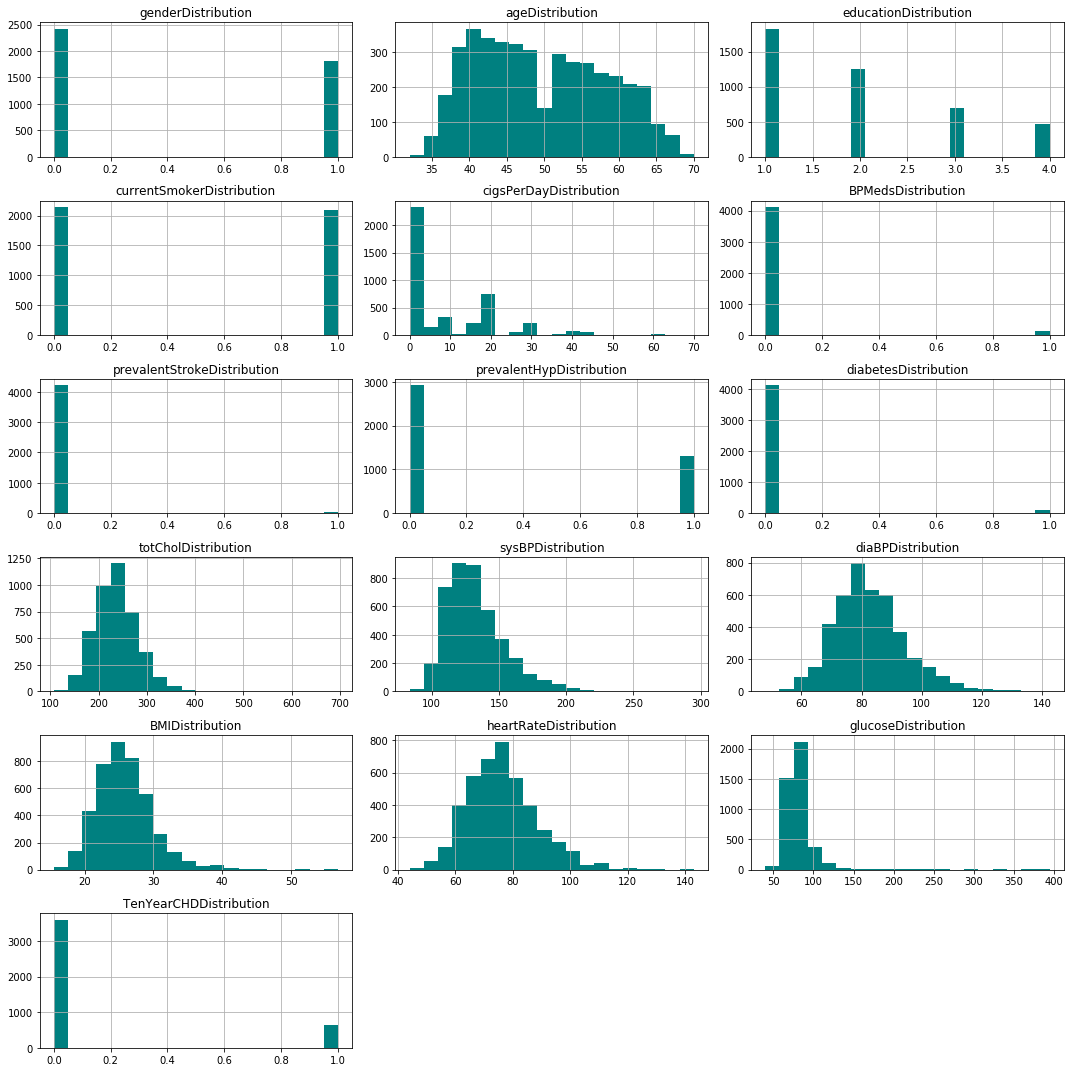

In [14]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='teal')
        ax.set_title(feature+"Distribution",color='black')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.029014,0.013361,0.197026,0.316023,-0.051544,-0.004550,0.005853,0.015693,-0.070111,-0.035879,0.058199,0.081631,-0.116911,0.005679,0.088374
age,-0.029014,1.000000,-0.165283,-0.213662,-0.192534,0.121011,0.057679,0.306799,0.101314,0.260709,0.394053,0.205586,0.135630,-0.012835,0.116941,0.225408
education,0.013361,-0.165283,1.000000,0.019399,0.010217,-0.010231,-0.032910,-0.078565,-0.038215,-0.024038,-0.126062,-0.062334,-0.139743,-0.049582,-0.034413,-0.053002
currentSmoker,0.197026,-0.213662,0.019399,1.000000,0.767051,-0.048348,-0.032980,-0.103710,-0.044285,-0.046191,-0.130281,-0.107933,-0.167537,0.062681,-0.054052,0.019448
cigsPerDay,0.316023,-0.192534,0.010217,0.767051,1.000000,-0.045683,-0.032710,-0.066444,-0.037085,-0.026165,-0.088523,-0.056474,-0.092948,0.075258,-0.056018,0.057647
BPMeds,-0.051544,0.121011,-0.010231,-0.048348,-0.045683,1.000000,0.114614,0.258580,0.051407,0.078789,0.251479,0.192254,0.099710,0.015136,0.048873,0.086448
prevalentStroke,-0.004550,0.057679,-0.032910,-0.032980,-0.032710,0.114614,1.000000,0.074791,0.006955,0.000099,0.057000,0.045153,0.025141,-0.017674,0.018059,0.061823
prevalentHyp,0.005853,0.306799,-0.078565,-0.103710,-0.066444,0.258580,0.074791,1.000000,0.077752,0.162681,0.696656,0.615840,0.300625,0.146780,0.082750,0.177458
diabetes,0.015693,0.101314,-0.038215,-0.044285,-0.037085,0.051407,0.006955,0.077752,1.000000,0.040158,0.111265,0.050260,0.086391,0.048986,0.605694,0.097344
totChol,-0.070111,0.260709,-0.024038,-0.046191,-0.026165,0.078789,0.000099,0.162681,0.040158,1.000000,0.207445,0.163424,0.114965,0.090693,0.044706,0.081813


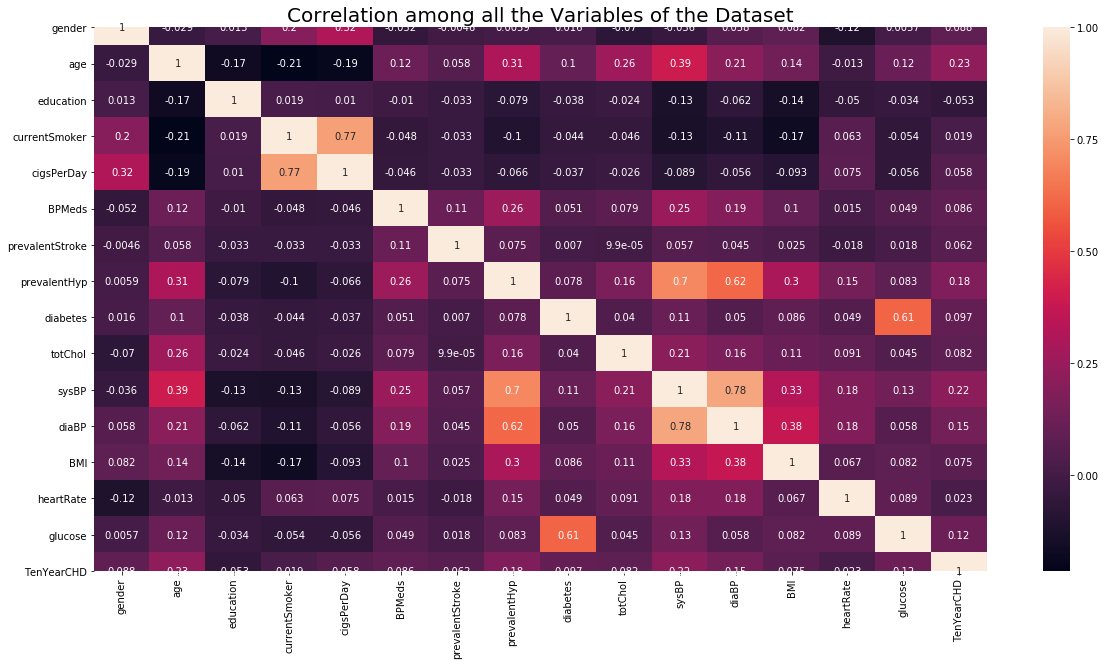

In [15]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

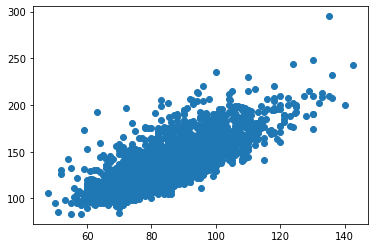

In [16]:
x = df['diaBP']
y = df['sysBP']
plt.scatter(x, y) 
plt.show()

Text(0, 0.5, 'Glucose count in mg/dL')

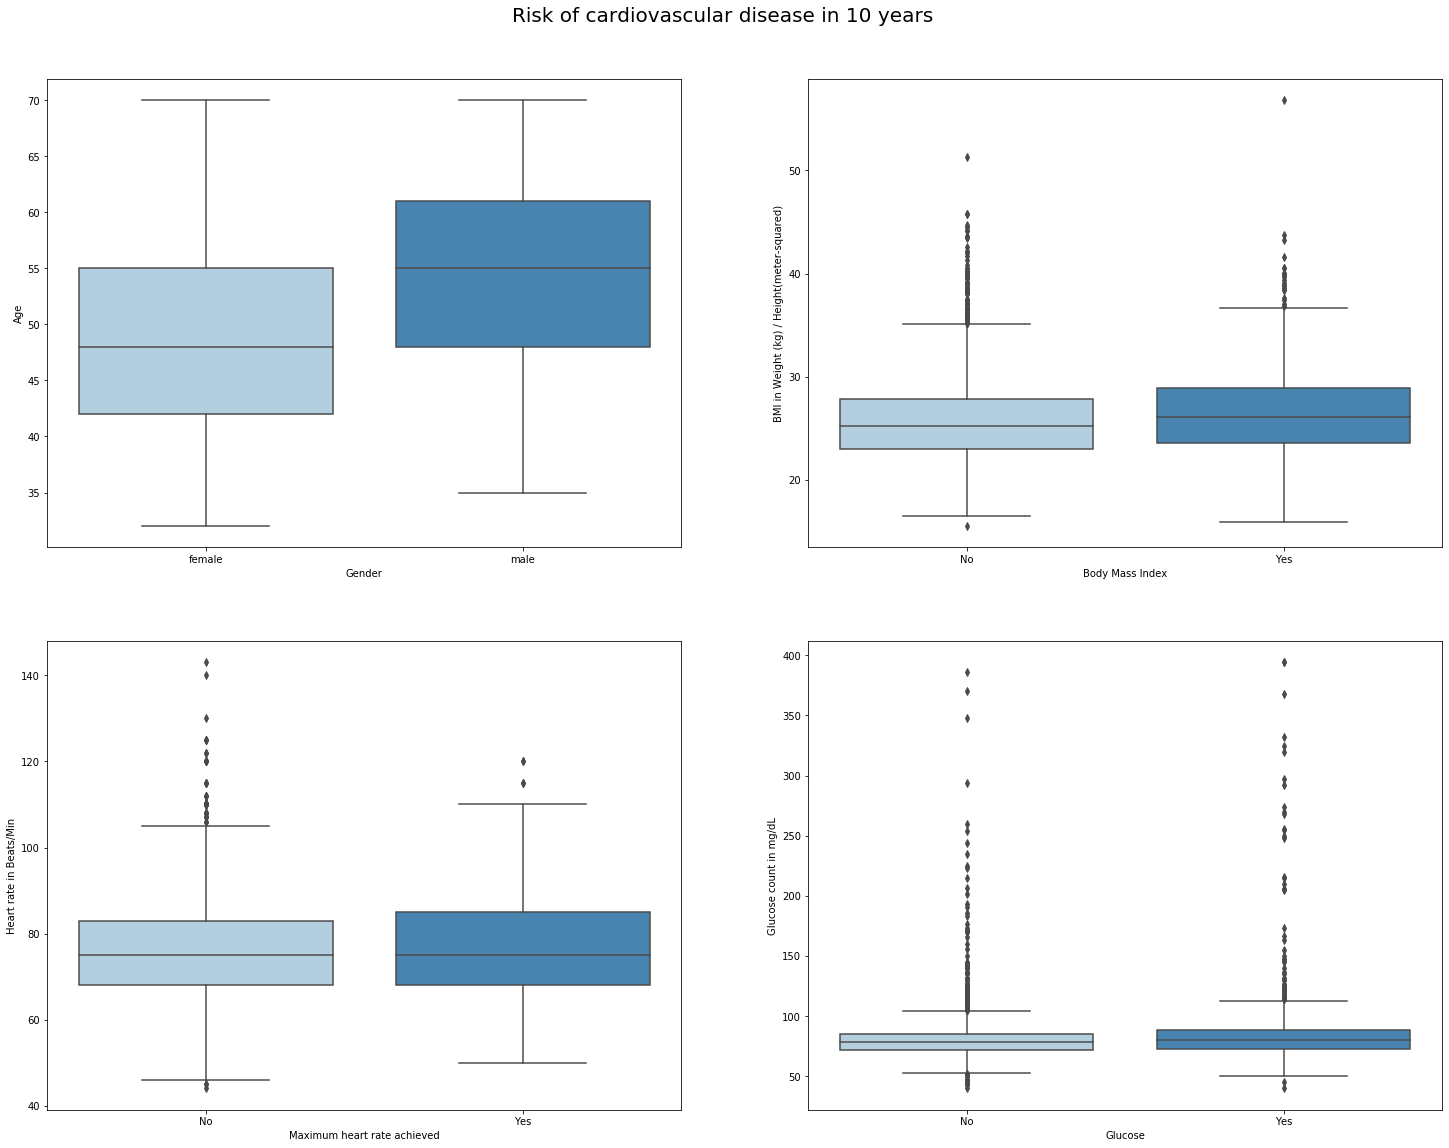

In [17]:
plt.figure(figsize = (25, 50))
plt.suptitle('Risk of cardiovascular disease in 10 years', y = 0.90, fontsize = 20)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, 0])
sns.boxplot(df['TenYearCHD'].replace({0:'female', 1:'male'}), df['age'], palette = 'Blues')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.subplot(gs[0, 1])
sns.boxplot(df['TenYearCHD'].replace({0:'No', 1:'Yes'}), df['BMI'], palette = 'Blues')
plt.xlabel('Body Mass Index')
plt.ylabel('BMI in Weight (kg) / Height(meter-squared)')

plt.subplot(gs[1, 0])
sns.boxplot(df['TenYearCHD'].replace({0:'No', 1:'Yes'}), df['heartRate'], palette = 'Blues')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Heart rate in Beats/Min')


plt.subplot(gs[1, 1])
sns.boxplot(df['TenYearCHD'].replace({0:'No', 1:'Yes'}), df['glucose'], palette = 'Blues')
plt.xlabel('Glucose')
plt.ylabel('Glucose count in mg/dL')

# 4. Model Selection.

In [18]:
# extract the target variable 
X, y = df.iloc[:, :-1], df.iloc[:, -1] 
print(X.shape) 
print(y.shape)

(4240, 15)
(4240,)


In [19]:
#split the data in 80% as Training and 20% as Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=879) 
print ("train_set_x shape: " + str(X_train.shape)) 
print ("train_set_y shape: " + str(y_train.shape)) 
print ("test_set_x shape: " + str(X_test.shape)) 
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (3392, 15)
train_set_y shape: (3392,)
test_set_x shape: (848, 15)
test_set_y shape: (848,)


In [20]:
# scale feature matrices 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [21]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):         
    """     Fit the chosen model and print out the score.   """     
    
    # instantiate model     
    model = classifier(**kwargs)   
    
    # train model     
    model.fit(X_train,y_train)  
    
    # check accuracy and print out the results     
    fit_accuracy = model.score(X_train, y_train)     
    test_accuracy = model.score(X_test, y_test)          
    print(f"Train accuracy: {fit_accuracy:0.2%}")     
    print(f"Test accuracy: {test_accuracy:0.2%}")          
    return model

## 4.1 K-Nearest Neighbours (KNN)

In [22]:
# KNN 
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier) 

Train accuracy: 86.38%
Test accuracy: 84.32%


## 4.2 Decision Trees

In [23]:
# Decision Tree 
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=1060) 

Train accuracy: 100.00%
Test accuracy: 76.18%


## 4.3 Logistic Regression

In [24]:
# Logistic Regression 
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.64%
Test accuracy: 85.26%


C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4.4 Gaussian Naive Bayes

In [25]:
#Gaussian Naive Bayes 
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 82.75%
Test accuracy: 82.19%


## 4.5 Support Vector Machines

In [26]:
#Support Vector Machines 
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 86.20%
Test accuracy: 85.02%


## 4.6 Random Forests

In [27]:
# Random Forests 
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=1060) 

Train accuracy: 97.73%
Test accuracy: 84.91%


C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 4.7 Comparing different Models

In [28]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=1060), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=1060)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.843160
Decision Trees,0.836085
Logistic Regression,0.852594
Naive Bayes,0.821934
SVM,0.847877
Random Forests,0.854953


# 5. Prediction of CVD's using Logistic Regression

In [30]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df.columns[:-1]
model=sm.Logit(df.TenYearCHD,df[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.397430
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:                 0.06699
Time:                        11:57:02   Log-Likelihood:                -1685.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.294e-43
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender              0.3737      0.097      3.853      0.000       0.184       0.564
age                 0.0285      0.005      5.221      0.000       0.018       0.039
education          -0.1618      0.044     -3.637      0.000      -0.249      -0.075
currentSmoker      -0.2528      0.141     -1.796      0.073      -0.529       0.023
cigsPerDay          0.0229      0.006      4.036      0.000       0.012       0.034
BPMeds              0.4103      0.217      1.895      0.058      -0.014       0.835
prevalentStroke     0.8768      0.436      2.009      0.045       0.021       1.732
prevalentHyp        0.9059      0.116      7.837      0.000       0.679       1.132
diabetes            0.8511      0.277      3.074      0.002       0.309       1.394
totChol            -0.0013      0.001     -1.317      0.188      -0.003       0.001
sysBP               0.0115      0.004      3.249      0.001       0.005       0.018
diaBP              -0.0244      0.006     -4.288      0.000      -0.036      -0.013
BMI                -0.0504      0.011     -4.416      0.000      -0.073      -0.028
heartRate          -0.0199      0.004     -5.422      0.000      -0.027      -0.013
glucose             0.0014      0.002      0.709      0.478      -0.003       0.005
===================================================================================
"""

In [31]:
def back_feature_elem (data_frame,dep_var,col_list):

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df,df.TenYearCHD,cols)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4229
Method:                           MLE   Df Model:                           10
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:                 0.06452
Time:                        11:57:02   Log-Likelihood:                -1689.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.969e-44
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender              0.3777      0.096      3.934      0.000       0.190       0.566
age                 0.0267      0.005      5.130      0.000       0.016       0.037
education          -0.1676      0.044     -3.801      0.000      -0.254      -0.081
cigsPerDay          0.0149      0.004      3.888      0.000       0.007       0.022
prevalentStroke     0.9785      0.435      2.249      0.025       0.126       1.831
prevalentHyp        0.9564      0.112      8.517      0.000       0.736       1.176
diabetes            0.9918      0.218      4.554      0.000       0.565       1.419
sysBP               0.0119      0.003      3.409      0.001       0.005       0.019
diaBP              -0.0257      0.006     -4.526      0.000      -0.037      -0.015
BMI                -0.0504      0.011     -4.493      0.000      -0.072      -0.028
heartRate          -0.0215      0.004     -6.070      0.000      -0.028      -0.015
===================================================================================
"""

In [32]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
gender               1.208651       1.761038    1.458931   0.000
age                  1.016630       1.037574    1.027048   0.000
education            0.775721       0.922059    0.845731   0.000
cigsPerDay           1.007426       1.022696    1.015032   0.000
prevalentStroke      1.134040       6.242023    2.660583   0.025
prevalentHyp         2.088175       3.242908    2.602261   0.000
diabetes             1.759391       4.131389    2.696058   0.000
sysBP                1.005082       1.018964    1.011999   0.001
diaBP                0.963901       0.985558    0.974669   0.000
BMI                  0.930186       0.971992    0.950859   0.000
heartRate            0.971982       0.985561    0.978748   0.000


In [33]:
import sklearn
new_features=df[['age','gender','cigsPerDay','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1060)

In [34]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


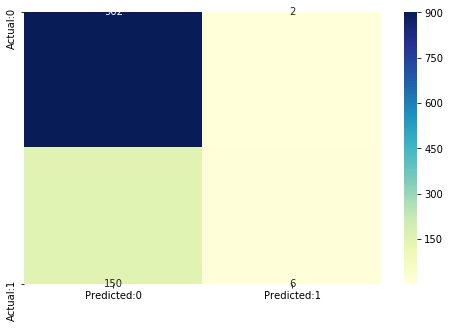

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [36]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [37]:
import sklearn
new_features=df[['age','gender','cigsPerDay','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1060)

In [38]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\Apurva Sarode\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.922848,0.077152
1,0.933089,0.066911
2,0.824034,0.175966
3,0.645383,0.354617
4,0.904009,0.095991


In [40]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
           'With',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[340 564]
 [ 21 135]] 
 With 475 correct predictions and 21 Type II errors( False Negatives) 

 Sensitivity:  0.8653846153846154 Specificity:  0.37610619469026546 



With 0.2 threshold the Confusion Matrix is  
 [[712 192]
 [ 73  83]] 
 With 795 correct predictions and 73 Type II errors( False Negatives) 

 Sensitivity:  0.532051282051282 Specificity:  0.7876106194690266 



With 0.3 threshold the Confusion Matrix is  
 [[854  50]
 [121  35]] 
 With 889 correct predictions and 121 Type II errors( False Negatives) 

 Sensitivity:  0.22435897435897437 Specificity:  0.9446902654867256 



With 0.4 threshold the Confusion Matrix is  
 [[893  11]
 [140  16]] 
 With 909 correct predictions and 140 Type II errors( False Negatives) 

 Sensitivity:  0.10256410256410256 Specificity:  0.9878318584070797 





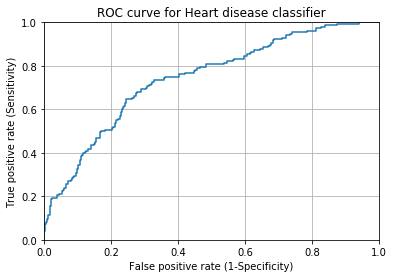

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

The optimum position for the roc curve is towards the top left corner, where the specificity and sensitivity are at optimum levels.

# Conclusion

- The logistic model was the best model with a predicting value of 86%. The model is more specific than sensitive.
- Men are more likely to have heart disease compared to women.
- An increase in Age, Cigarettes per day, and Systolic Blood Pressure would also increase the probability of having CHD.
- The attributes which were eliminated having the P value less than 0.05 and thus suggested a significant role in the prediction of CHD.
- We could not see any significant change in the odds of CHD with respect to Total cholesterol. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Also, Glucose too causes a very negligible change in odds.
- The ROC curve is about 74%, which is much satisfactory. Also, the overall model can be improved by getting a greater number of data
